# Fake News Detector - EDA & Preprocessing

Objective: Explore and prepare the dataset for building a fake news detection model.
Dataset: Fake and Real news articles from Kaggle

### Importing Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

# For text cleaning
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer


from wordcloud import WordCloud
import nltk
from bs4 import BeautifulSoup


In [2]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/aman/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Load Data

In [5]:
fake = pd.read_csv('../data/Fake.csv')
real = pd.read_csv('../data/True.csv')

In [6]:
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [7]:
#Add labels
fake['label'] = 0
real['label'] = 1

#Combine the two datasets
data = pd.concat([fake, real], axis=0, ignore_index=True)


In [8]:
# Shuffle
data = data.sample(frac=1, random_state=42).reset_index(drop=True)


In [9]:
data.label.value_counts()


label
0    23481
1    21417
Name: count, dtype: int64

In [34]:
# Text Preprocessing Function
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)




In [35]:
# Apply the function to the text columns
data['text'] = data['title'] + ' ' + data['text']
data['clean_text'] = data['text'].apply(clean_text)


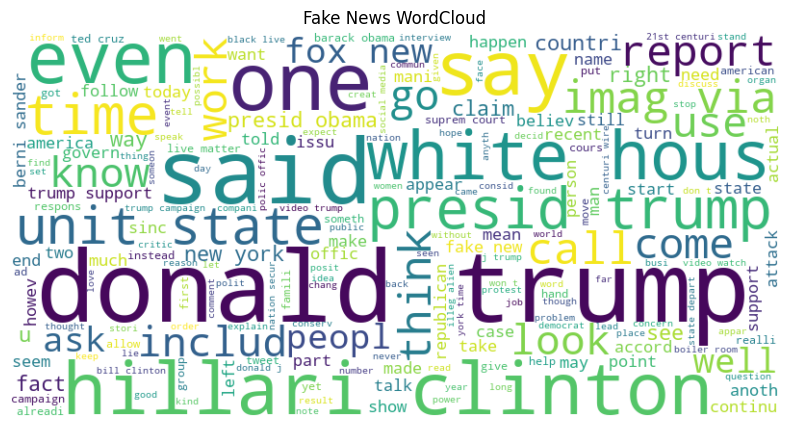

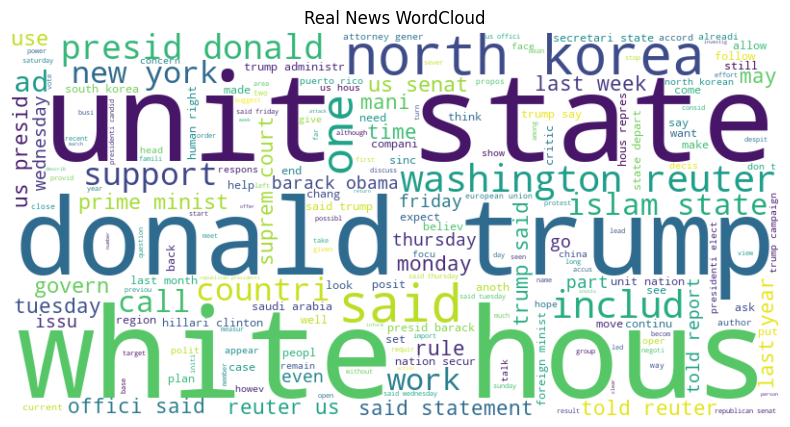

In [36]:
def show_wordcloud(text, title):
    wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

show_wordcloud(data[data.label == 0]['clean_text'], 'Fake News WordCloud')
show_wordcloud(data[data.label == 1]['clean_text'], 'Real News WordCloud')


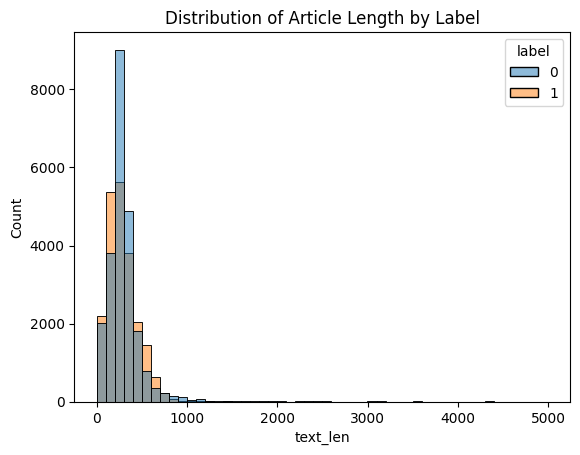

In [37]:
#Article Length Distribution
data['text_len'] = data['clean_text'].apply(lambda x: len(x.split()))
sns.histplot(data=data, x='text_len', hue='label', bins=50)
plt.title("Distribution of Article Length by Label")
plt.show()

In [38]:
data

,title,text,subject,date,label,clean_text,text_len
0,Ben Stein Calls Out 9th Circuit Court: Committ...,Ben Stein Calls Out 9th Circuit Court: Committ...,US_News,"February 13, 2017",0,ben stein call 9th circuit court commit ‘coup ...,159
1,Trump drops Steve Bannon from National Securit...,Trump drops Steve Bannon from National Securit...,politicsNews,"April 5, 2017",1,trump drop steve bannon nation secur council t...,515
2,Puerto Rico expects U.S. to lift Jones Act shi...,Puerto Rico expects U.S. to lift Jones Act shi...,politicsNews,"September 27, 2017",1,puerto rico expect us lift jone act ship restr...,231
3,OOPS: Trump Just Accidentally Confirmed He Le...,OOPS: Trump Just Accidentally Confirmed He Le...,News,"May 22, 2017",0,oop trump accident confirm leak isra intellig ...,160
4,Donald Trump heads for Scotland to reopen a go...,Donald Trump heads for Scotland to reopen a go...,politicsNews,"June 24, 2016",1,donald trump head scotland reopen golf resort ...,357
...,...,...,...,...,...,...,...
44893,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,politics,"Mar 27, 2017",0,unreal cbs’ ted koppel tell sean hanniti he’ “...,66
44894,PM May seeks to ease Japan's Brexit fears duri...,PM May seeks to ease Japan's Brexit fears duri...,worldnews,"August 29, 2017",1,pm may seek eas japan brexit fear trade visit ...,484
44895,Merkel: Difficult German coalition talks can r...,Merkel: Difficult German coalition talks can r...,worldnews,"November 16, 2017",1,merkel difficult german coalit talk reach deal...,80
44896,Trump Stole An Idea From North Korean Propaga...,Trump Stole An Idea From North Korean Propaga...,News,"July 14, 2017",0,trump stole idea north korean propaganda parod...,591


In [39]:
# Save cleaned data
data[['clean_text','label']].to_csv('../data/cleaned_fake_news.csv', index=False)
